# **Import de librairies**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from tqdm import tqdm
import numpy as np

# **Chargement du dataset**

In [2]:
df = pd.read_csv("SpotifyFeatures.csv")

# **EDA (Exploratory Data Analysis) + Nettoyage**

### **Exploration préliminaire**

In [3]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 232725 lignes.


### **Traitement des valeurs nulles**

In [6]:
df.isna().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Une seule valeur nulle dans la colonne 'track_name'.

In [7]:
df[df['track_name'].isna()].index

Index([208285], dtype='int64')

In [8]:
df.iloc[208285]

genre                                World
artist_name              Elevation Worship
track_name                             NaN
track_id            7BGQCe62A58Q5ZgpQFX93t
popularity                              44
acousticness                         0.019
danceability                         0.287
duration_ms                         350027
energy                               0.446
instrumentalness                       0.0
key                                      F
liveness                               0.1
loudness                            -7.214
mode                                 Major
speechiness                         0.0317
tempo                              138.727
time_signature                         4/4
valence                             0.0387
Name: 208285, dtype: object

track_id = l'URI nous mène vers la track sur spotify
https://open.spotify.com/intl-fr/track/ 7BGQCe62A58Q5ZgpQFX93t 

Le titre du morceau s'appelle "None".

In [9]:
df = df.fillna('None')

### **Analyse et nettoyage des colonnes**

In [10]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

#### **Colonnes catégorielles**

In [11]:
colonnes_cat = df.select_dtypes(include=['object'])
colonnes_cat

,genre,artist_name,track_name,track_id,key,mode,time_signature
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,C#,Major,4/4
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,F#,Minor,4/4
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,C,Minor,5/4
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,C#,Major,4/4
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,F,Major,4/4
...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,D,Major,4/4
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,E,Minor,4/4
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,D,Major,4/4
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,A,Major,4/4


##### ***Genre***

In [12]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

erreur observée : "Children's Music", 'Children’s Music'

In [13]:
print(f"Il y a {df['genre'].nunique()} genres uniques dans le dataset" )

Il y a 27 genres uniques dans le dataset


In [14]:
df['genre'] = df['genre'].str.replace('’', "'", regex=False)
df['genre'] = df['genre'].str.lower().str.strip()

In [15]:
print(f"Il y a {df['genre'].nunique()} genres uniques dans le dataset" )

Il y a 26 genres uniques dans le dataset


In [16]:
df= df.drop(columns=['genre'])

In [17]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 232725 lignes.


constat d'incohérence probant :imprim écran Céline Dion ou Francis Lalane 

Enrichissement à prévoir sur la colonne genre pour avoir plus de cohérence et retrouver la variété française.

##### ***Artist name***


In [18]:
print(f"Il y a {df['artist_name'].nunique()} noms d'artistes uniques dans ce dataset.")

Il y a 14564 noms d'artistes uniques dans ce dataset.


In [19]:
df['artist_name'].value_counts().head(28)

artist_name
Giuseppe Verdi              1394
Giacomo Puccini             1137
Kimbo Children's Music       971
Nobuo Uematsu                825
Richard Wagner               804
Wolfgang Amadeus Mozart      800
Randy Newman                 757
Georges Bizet                701
Juice Music                  684
Johann Sebastian Bach        632
Ludwig van Beethoven         596
Hans Zimmer                  559
Gioachino Rossini            491
Chorus                       480
Howard Shore                 479
Drake                        477
Henri Salvador               474
John Williams                450
Frédéric Chopin              436
Alan Menken                  420
Chris Brown                  392
Bob Marley & The Wailers     380
Dorothée                     378
Gaetano Donizetti            377
Children Songs Company       371
Max Richter                  365
Capcom Sound Team            326
Future                       317
Name: count, dtype: int64

In [20]:
df['artist_name'] = df['artist_name'].str.replace('’', "'",  regex=False)  # apostrophe typographique
df['artist_name'] = df['artist_name'].str.lower().str.strip()  # minuscule + suppression espaces    

In [21]:
print(f"Il y a {df['artist_name'].nunique()} noms d'artistes uniques dans ce dataset.")

Il y a 14561 noms d'artistes uniques dans ce dataset.


In [22]:
df.head(28)

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,henri salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.8140
1,martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.8160
2,joseph williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.3680
3,henri salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.2270
4,fabien nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.3900
5,henri salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.000000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.3580
6,martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.000000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.5330
7,laura mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.000000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.2740
8,chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.000860,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.7650
9,le club des juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.001250,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.7180


Voir si pas d'autres fautes orthographes : 
- & et and par exemple.
- retirer The

L'artiste au plus grand nombre de titres dans le dataset est Verdi qui en compte 1394.

Voir 

##### ***Track name***

In [23]:
print(f"Il y a {df['track_name'].nunique()} noms de titres uniques dans ce dataset.")

Il y a 148615 noms de titres uniques dans ce dataset.


In [24]:
df['track_name'] = df['track_name'].str.replace('’', "'",  regex=False)  # apostrophe typographique
df['track_name'] = df['track_name'].str.lower().str.strip()  # minuscule + suppression espaces    

In [25]:
print(f"Il y a {df['track_name'].nunique()} noms de titres uniques dans ce dataset.")

Il y a 145281 noms de titres uniques dans ce dataset.


Voir d'autres fautes d'orthographes.

#####  ***Track id***

In [26]:
df[df['track_id']=="0NOh9M0tIGappRjE5oVaUc"]

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9350,disturbed,legion of monsters,0NOh9M0tIGappRjE5oVaUc,50,0.000244,0.604,263640,0.988,0.000043,F,0.291,-2.361,Minor,0.0695,128.04,4/4,0.683
99501,disturbed,legion of monsters - bonus track,0NOh9M0tIGappRjE5oVaUc,55,0.000244,0.604,263640,0.988,0.000043,F,0.291,-2.361,Minor,0.0695,128.04,4/4,0.683


In [27]:
print(f"Le dataset a {len(df)} lignes.")

Le dataset a 232725 lignes.


In [28]:
print(f"Il y a {df['track_id'].nunique()} URI uniques dans ce dataset.")

Il y a 176774 URI uniques dans ce dataset.


In [29]:
print(f"Il y a {len(df)-(df['track_id'].nunique())} doublons dans le dataset")

Il y a 55951 doublons dans le dataset


In [30]:
df['track_id'].value_counts().head(28)

track_id
6sVQNUvcVFTXvlk3ec0ngd    8
3R73Y7X53MIQZWnKloWq5i    8
6AIte2Iej1QKlaofpjCzW1    8
0UE0RhnRaEYsiYgXpyLoZc    8
3uSSjnDMmoyERaAK9KvpJR    8
0wY9rA9fJkuESyYm9uzVK5    8
5g3TDpgy1J1woAUVuj21EE    7
3nXrCAE44KlevAkQB2XWcN    7
6M6UoxIPn4NOWW0x7JPRfv    7
6NqbN00vLmWfrQSx2wjD4z    7
3GZD6HmiNUhxXYf8Gch723    7
4tggZyGJMNJMooWuRbvN5q    7
5rAff9XfcWx7rguN3t0fkW    7
1FTSo4v6BOZH9QxKc3MbVM    7
5gW5dSy3vXJxgzma4rQuzH    7
2q0VexHJirnUPnEOhr2DxK    7
5lcyIeEfwZTs8Ajw3kdF7P    7
7qCZgvV98j6RjUULW1s1it    7
6TFUZ8Bt1brEwomY90SKXi    7
4bnjq8zqtCnxTGxll5ezOO    7
5YxaccATvDTIOpue7vu6Tn    7
7rAUH8YZRvGyZ5wmoKjYbG    7
2CInzVilMduj9L8dDXwyUA    7
6INaSJ4clfZ8pvXSGZQnJ7    7
6NueIkCzLhp4rXpNAiXDdh    7
1HwbgJAU9PZ7YbzKgVgoIF    7
2gE0khQ948RYQOeTgCUL2a    7
0725YWm6Z0TpZ6wrNk64Eb    7
Name: count, dtype: int64

In [31]:
df[df['track_id']== '6sVQNUvcVFTXvlk3ec0ngd']

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
10230,cocteau twins,cherry-coloured funk,6sVQNUvcVFTXvlk3ec0ngd,57,0.00174,0.377,192467,0.65,0.000058,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
20391,cocteau twins,cherry-coloured funk,6sVQNUvcVFTXvlk3ec0ngd,61,0.00174,0.377,192467,0.65,0.000058,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
22947,cocteau twins,cherry-coloured funk,6sVQNUvcVFTXvlk3ec0ngd,61,0.00174,0.377,192467,0.65,0.000058,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
44871,cocteau twins,cherry-coloured funk,6sVQNUvcVFTXvlk3ec0ngd,61,0.00174,0.377,192467,0.65,0.000058,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
102041,cocteau twins,cherry-coloured funk,6sVQNUvcVFTXvlk3ec0ngd,61,0.00174,0.377,192467,0.65,0.000058,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
141335,cocteau twins,cherry-coloured funk,6sVQNUvcVFTXvlk3ec0ngd,61,0.00174,0.377,192467,0.65,0.000058,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
153467,cocteau twins,cherry-coloured funk,6sVQNUvcVFTXvlk3ec0ngd,61,0.00174,0.377,192467,0.65,0.000058,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
207908,cocteau twins,cherry-coloured funk,6sVQNUvcVFTXvlk3ec0ngd,61,0.00174,0.377,192467,0.65,0.000058,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365


In [32]:
df.groupby(['artist_name', 'track_name']).size().reset_index(name='count').query('count > 1')

,artist_name,track_name,count
6,!!!,even when the water's cold,6
16,!!!,lucy mongoosey,2
36,"""weird al"" yankovic","amish paradise (parody of ""gangsta's paradise""...",2
102,$uicideboy$,$outh $ide $uicide,2
103,$uicideboy$,"10,000 degrees",2
...,...,...,...
175329,ñejo,se te hizo tarde,2
175362,ñejo & dalmata,pasarela,2
175369,ñejo & dalmata,sexo en la playa,2
175382,ólafur arnalds,dalur - island songs v,2


In [33]:
# Identifier les track_id qui apparaissent plus d'une fois
df_duplicates = df[df.duplicated(subset=['track_id'])]
df_duplicates

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1348,doja cat,go to town,6iOvnACn4ChlAw4lWUU4dd,64,0.07160,0.710,217813,0.710,0.000001,C,0.2060,-2.474,Major,0.0579,169.944,4/4,0.700
1385,frank ocean,seigfried,1BViPjTT585XAhkUUrkts0,61,0.97500,0.377,334570,0.255,0.000208,E,0.1020,-11.165,Minor,0.0387,125.004,5/4,0.370
1452,frank ocean,bad religion,2pMPWE7PJH1PizfgGRMnR9,56,0.77900,0.276,175453,0.358,0.000003,A,0.0728,-7.684,Major,0.0443,81.977,4/4,0.130
1554,steve lacy,some,4riDfclV7kPDT9D58FpmHd,58,0.00548,0.784,118393,0.554,0.254000,G,0.0995,-6.417,Major,0.0300,104.010,4/4,0.634
1634,tobi lou,buff baby,1F1QmI8TMHir9SUFrooq5F,59,0.19000,0.736,215385,0.643,0.000000,F,0.1060,-8.636,Major,0.0461,156.002,4/4,0.599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232715,emily king,down,5cA0vB8c9FMOVDWyJHgf26,42,0.55000,0.394,281853,0.346,0.000002,E,0.1290,-13.617,Major,0.0635,90.831,4/4,0.436
232718,muddy waters,i just want to make love to you - electric mud...,2HFczeynfKGiM9KF2z2K7K,43,0.01360,0.294,258267,0.739,0.004820,C,0.1380,-7.167,Major,0.0434,176.402,4/4,0.945
232720,slave,son of slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232722,muddy waters,(i'm your) hoochie coochie man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813


In [34]:
audio_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
                  'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 
                  'speechiness', 'tempo', 'time_signature', 'valence']

# Identifier les track_id avec des valeurs incohérentes
problematic_tracks = []

for track_id, group in df_duplicates.groupby('track_id'):
    for col in audio_features:
        if group[col].nunique() > 1:
            problematic_tracks.append(track_id)
            break  

print(f"Nombre de track_id incohérents : {len(problematic_tracks)}")
print("Liste des track_id :")
print(problematic_tracks)

Nombre de track_id incohérents : 9
Liste des track_id :
['1o4aDH0BYwZdSEm7fJzYhD', '3Y1skP4N1zbrSuH1xfLm9k', '3hFIXFEPtvruqYsoMW2eKN', '3tUdpqlrhZONJBRVXDxegM', '4I5uWfaZIrkKCHrbO7eLMV', '4PIrQHxXlHlSXKoKd2nuxE', '6GQoR1abZRKj3R41nJqTX6', '6UNV8mflEmh8PJqeTPC1p3', '7N0T6i3ZER3p3SYBzxMeCV']


In [35]:
# Supprimer ces track_id du DataFrame
df_clean = df[~df['track_id'].isin(problematic_tracks)]

print(f"Lignes supprimées : {len(df) - len(df_clean)}")
print(f"DataFrame nettoyé : {len(df_clean)} lignes")

Lignes supprimées : 32
DataFrame nettoyé : 232693 lignes


In [36]:
# Garder la ligne avec la popularité max pour chaque track_id
df = df_clean.loc[df_clean.groupby('track_id')['popularity'].idxmax()]
df

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
34788,capcom sound team,zangief's theme,00021Wy6AyMbLP2tqij86e,13,0.2340,0.617,169173,0.862,0.976000,G,0.1410,-12.855,Major,0.0514,129.578,4/4,0.886
546,henri salvador,coeur brisé à prendre - remastered,000CzNKC8PEt1yC3L8dqwV,5,0.2490,0.518,130653,0.805,0.000000,F,0.3330,-6.248,Major,0.0407,79.124,4/4,0.841
136665,mike love,earthlings,000DfZJww8KiixTKuk9usJ,30,0.3660,0.631,357573,0.513,0.000004,D,0.1090,-6.376,Major,0.0293,120.365,4/4,0.307
177169,don philippe,fewerdolr,000EWWBkYaREzsBplYjUag,39,0.8150,0.768,104924,0.137,0.922000,C#,0.1130,-13.284,Minor,0.0747,76.430,4/4,0.560
14492,zayn,still got time,000xQL6tZNLJzIrtIgxqSl,70,0.1310,0.748,188491,0.627,0.000000,G,0.0852,-6.029,Major,0.0644,120.963,4/4,0.524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147669,caravan palace,maniac,7zz7MbCb9G7KJc1NVl9bL0,38,0.4000,0.851,251267,0.790,0.230000,C,0.1230,-4.641,Minor,0.0309,111.993,4/4,0.889
176037,thelonious monk quartet,crepescule with nellie - live at carnegie hall...,7zzFNNxVD0h0ctAT08H0pa,40,0.9730,0.538,266933,0.144,0.177000,G#,0.3590,-17.711,Major,0.0569,135.640,3/4,0.110
163359,magnate y valentino,una en un millón,7zzTeItz93lYI52hlcipm5,28,0.1130,0.716,228493,0.806,0.000000,G,0.1510,-5.913,Minor,0.1350,136.069,4/4,0.544
100080,moonstar88,migraine,7zzZmpw8L66ZPjH1M6qmOs,67,0.2170,0.664,267960,0.537,0.000003,D,0.1180,-6.000,Major,0.0290,115.049,4/4,0.221


##### **Analyse croisée artist_name / track_name :**

In [37]:
df[df['artist_name'] == 'giuseppe verdi']['track_name'].value_counts().head(28)

track_name
la traviata / act 2: "dammi tu forza, o cielo!"                      2
la traviata / act 2: "noi siamo zingarelle"                          2
la traviata / act 3: "prendi, quest'è l'immagine"                    2
la traviata / act 2: "alfredo! voi!"                                 2
la traviata / act 2: "di sprezzo degno se stesso rende"              2
la traviata / act 2: "avrem lieta di maschere la notte"              2
la traviata / act 1: "dell'invito trascorsa è già l'ora"             2
la traviata / act 2: "lunge da lei" - "de' miei bollenti spiriti"    2
la forza del destino: overture                                       2
la traviata / act 1: "e strano!" - "ah, fors'è lui"                  2
la traviata / act 2: "alfredo, alfredo, di questo core"              2
la traviata / act 2: "ah, vive sol quel core"                        2
la traviata / act 2: "ah! dite alla giovine"                         2
la traviata / act 1: prelude                                      

En prenant Verdi pour exemple on observe qu'un même titre peut apparaitre plusieurs fois dans le dataset.

Pour éviter les doublons, nous conservons la version la plus populaire pour chaque couple track_name / artist_name.

In [38]:
df= df.loc[df.groupby(['track_name', 'artist_name'])['popularity'].idxmax()]
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 175489 lignes.


##### ***Key***

In [39]:
df['key'].unique()

array(['F', 'C#', 'G#', 'C', 'D', 'D#', 'G', 'B', 'A#', 'A', 'E', 'F#'],
      dtype=object)

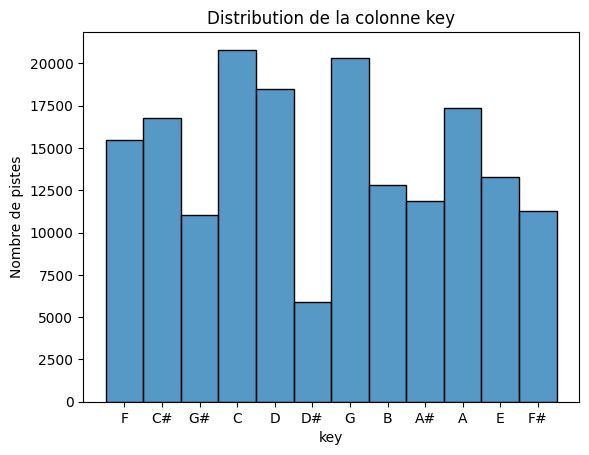

In [40]:
counts_key = df['key'].value_counts()
sns.histplot(data=df, x="key")
plt.title('Distribution de la colonne key')
plt.xlabel('key')
plt.ylabel('Nombre de pistes')
plt.show()

/tmp/ipykernel_73096/2659825684.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


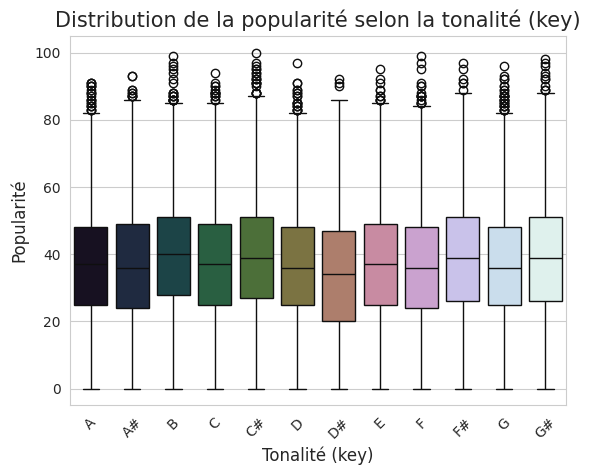

In [41]:
# Boxplot pour la variable "key"
# Objectif : visualiser la distribution d'une variable numérique (par exemple "popularity") selon chaque tonalité ("key")

sns.set_style("whitegrid")  # Ajoute une grille de fond pour une meilleure lisibilité

# Création du boxplot : on affiche la distribution de la popularité pour chaque "key"
ax = sns.boxplot(
    data=df,                  # DataFrame contenant les données
    x="key",                          # Variable catégorielle sur l'axe des x (tonalité)
    y="popularity",                   # Variable numérique sur l'axe des y (exemple : popularité)
    palette="cubehelix",              # Palette de couleurs pour différencier les tonalités
    order=sorted(df["key"].unique())  # Trie les tonalités pour un affichage ordonné
)

# Ajout d'un titre et de labels explicites pour les axes
plt.title('Distribution de la popularité selon la tonalité (key)', fontsize=15)
plt.xlabel('Tonalité (key)', fontsize=12)
plt.ylabel('Popularité', fontsize=12)

# Optionnel : rotation des labels x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Affichage du graphique final
plt.show()

Voir les corrélations avec mode et valence dans la suite de l'analyse.

Commentaire d'analyse

##### ***Mode***

In [42]:
df["mode"].unique()

array(['Major', 'Minor'], dtype=object)

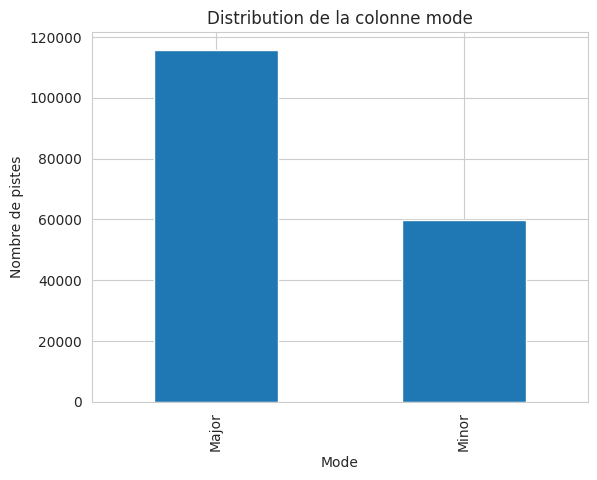

In [43]:
counts = df['mode'].value_counts()
counts.plot(kind='bar')
plt.title('Distribution de la colonne mode')
plt.xlabel('Mode')
plt.ylabel('Nombre de pistes')
plt.show()

COmmentaires?

***Time signature***

In [44]:
df['time_signature'].describe()

count     175489
unique         5
top          4/4
freq      148114
Name: time_signature, dtype: object

In [45]:
df['time_signature'].unique()

array(['4/4', '3/4', '5/4', '1/4', '0/4'], dtype=object)

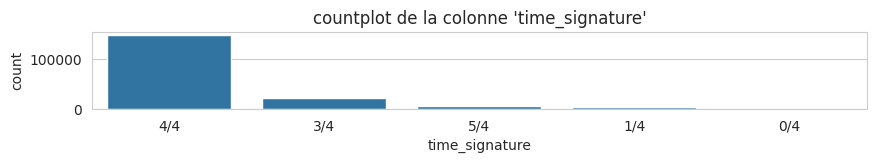

In [46]:
plt.figure(figsize=(10, 1))
sns.countplot(x=df['time_signature'])
plt.title("countplot de la colonne 'time_signature'")
plt.show()

- je supprime les valeurs aberrantes 0 Impossible en musique → à supprimer
- et 1 Musicalement peu plausible → probablement une erreur de parsing ou un tag incohérent

Verifier 1/4 si la valeur n'est pas mal enregistrée.

In [47]:
# Extraire uniquement le numérateur de la signature (4, 5, 3, etc.) pour en faire une colonne numérique propre.
# Étape 1 : Extraire la partie avant le '/' et la convertir en entier
df['time_signature_clean'] = df['time_signature'].str.extract(r'^(\d+)').astype('Int64')
df['time_signature'] = df['time_signature_clean']
df.drop(columns='time_signature_clean', inplace=True)


df = df[df['time_signature'].isin([3, 4, 5])]
df

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
58300,maria callas,""" la traviata "" : amami alfredo (act ii) - dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4,0.0394
32571,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3,0.0835
89661,rae sremmurd,"""42"" - from sr3mm",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4,0.3240
142359,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4,0.4230
33675,yuki hayashi,"""6人で(強い方が強い)""",0qwK0LvMyAQ7J1rEEL6nbr,17,0.971000,0.176,171000,0.125,0.904000,C,0.129,-16.699,Major,0.0349,136.076,3,0.0461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,got7,하드캐리 hard carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4,0.6120
219320,park hyo shin,해줄 수 없는 일 haejul su eomneun il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4,0.1550
149889,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4,0.6510
220337,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4,0.2740


#### **Colonnes numériques**

In [48]:
# Sélection numérique
colonnes_num = df.select_dtypes(include=['float64', 'int64'])
colonnes_num

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
58300,31,0.993000,0.364,131933,0.275,0.028400,0.293,-11.832,0.0430,86.096,4,0.0394
32571,23,0.025000,0.250,158000,0.762,0.516000,0.094,-12.794,0.0468,89.093,3,0.0835
89661,53,0.002750,0.968,238020,0.563,0.000000,0.108,-6.744,0.1250,130.039,4,0.3240
142359,48,0.000696,0.315,202493,0.970,0.000000,0.277,-4.709,0.1020,178.068,4,0.4230
33675,17,0.971000,0.176,171000,0.125,0.904000,0.129,-16.699,0.0349,136.076,3,0.0461
...,...,...,...,...,...,...,...,...,...,...,...,...
150871,63,0.014800,0.700,193579,0.873,0.000000,0.343,-2.901,0.0869,99.972,4,0.6120
219320,30,0.729000,0.332,260600,0.493,0.000000,0.165,-6.126,0.0318,110.024,4,0.1550
149889,64,0.002110,0.613,205149,0.874,0.000000,0.134,-3.712,0.0335,102.975,4,0.6510
220337,27,0.513000,0.521,298760,0.423,0.000004,0.131,-6.770,0.0324,59.036,4,0.2740


In [49]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
count,173156.000000,173156.000000,173156.000000,1.731560e+05,173156.000000,173156.000000,173156.000000,173156.000000,173156.000000,173156.000000,173156.0,173156.000000
mean,36.681732,0.399123,0.542927,2.365849e+05,0.559817,0.171197,0.223433,-10.059171,0.125707,117.346258,3.906304,0.453338
std,17.551078,0.364959,0.189894,1.298731e+05,0.274699,0.322117,0.209583,6.343809,0.201059,31.313456,0.368569,0.267551
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,3.0,0.000000
25%,25.000000,0.044200,0.418000,1.789730e+05,0.350000,0.000000,0.097400,-12.719000,0.036800,92.047000,4.0,0.224000
50%,37.000000,0.279000,0.560000,2.197600e+05,0.595000,0.000070,0.130000,-8.129000,0.049400,115.068000,4.0,0.443000
75%,49.000000,0.783000,0.685000,2.687730e+05,0.791000,0.088300,0.276000,-5.605000,0.101000,138.999250,4.0,0.669000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,5.0,1.000000


##### ***Popularity***

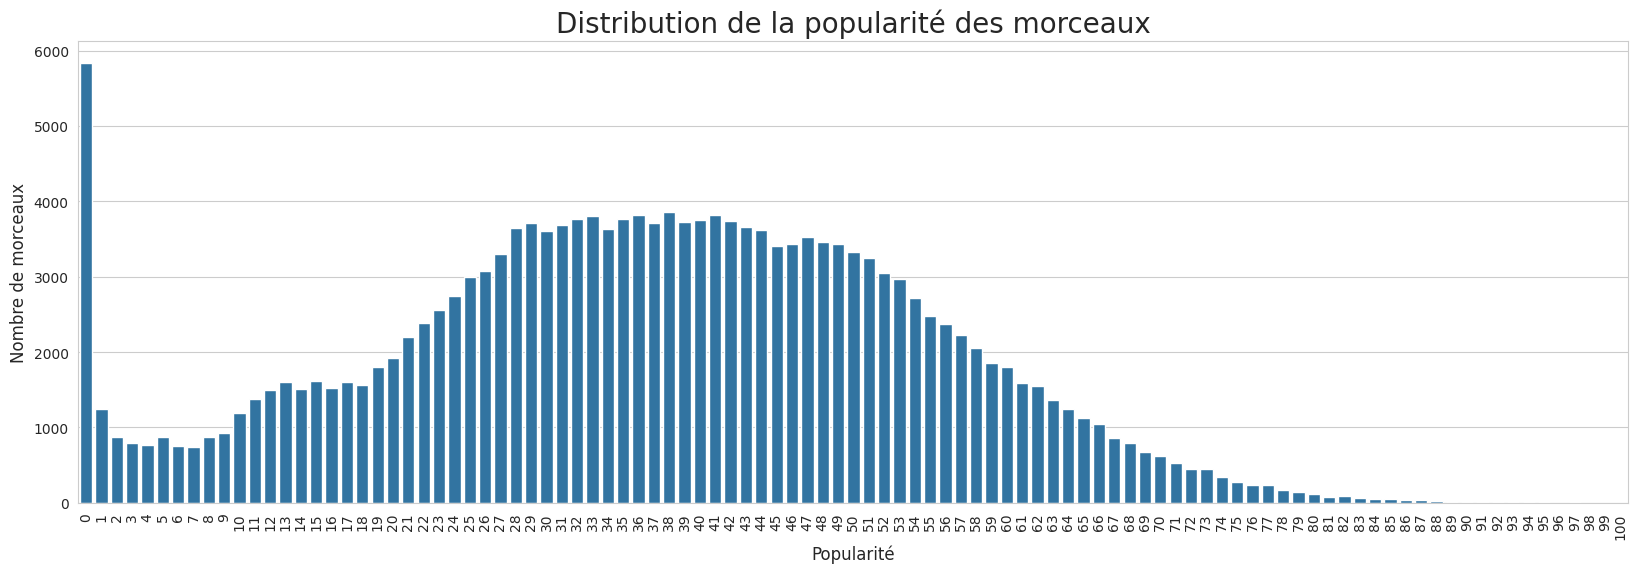

In [50]:
plt.figure(figsize=(20, 6))  
sns.countplot(data=df,
              x='popularity')

plt.title('Distribution de la popularité des morceaux', fontsize=20)
plt.xlabel('Popularité', fontsize=12)
plt.ylabel('Nombre de morceaux', fontsize=12)
plt.xticks(rotation=90)  
plt.show()

Pour chaque titre de chanson unique (track_name) sélectionne la ligne ayant la popularité maximale (popularity) dans le DataFrame df.

In [51]:
df = df.loc[df.groupby('track_name')['popularity'].idxmax()]

On décide de ne garder que les scores au dessus de 20/100 de popularité.

In [52]:
df = df[df['popularity'] >= 20] 

In [53]:
print(f"Le dataset a désormais {len(df)} lignes.")  

Le dataset a désormais 118431 lignes.


##### ***Acousticness***

##### ***Danceability***

##### ***Duration ms***

##### ***Energy***

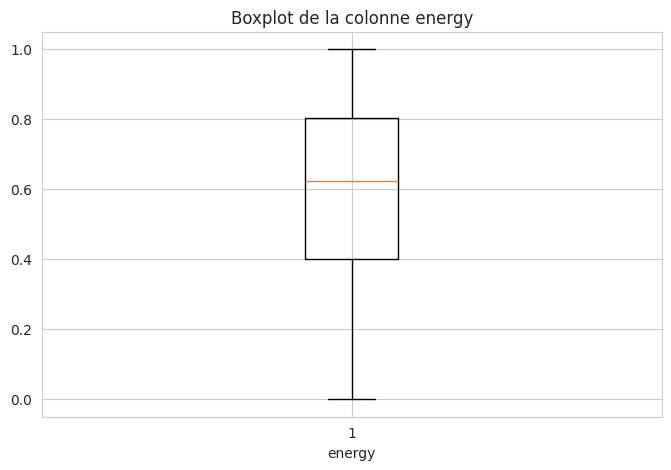

In [54]:
plt.figure(figsize=(8, 5))
plt.boxplot(x= df['energy'])

plt.title('Boxplot de la colonne energy')
plt.xlabel('energy')

plt.show()

- La médiane au-dessus de 0.6 montre que plus de la moitié des morceaux ont un niveau d’énergie modéré à élevé.
- Possible classification à réaliser morceaux en faible / moyenne / forte énergie pour répondre à l'activité

##### ***Instrumentalness***

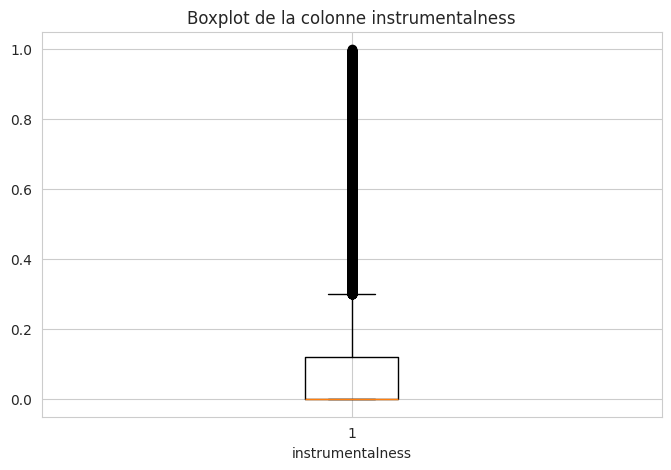

In [55]:
plt.figure(figsize=(8, 5))
plt.boxplot(x= df['instrumentalness'])

plt.title('Boxplot de la colonne instrumentalness')
plt.xlabel('instrumentalness')

plt.show()

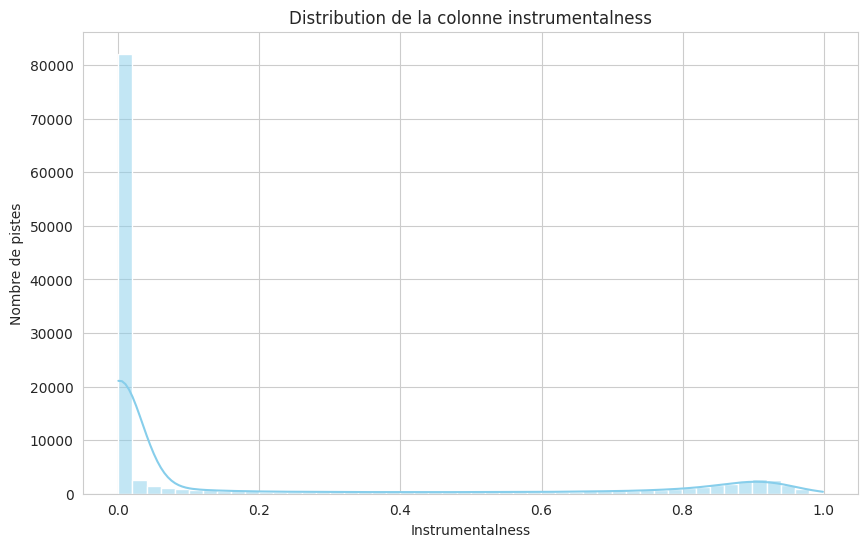

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['instrumentalness'], bins=50, kde=True, color='skyblue')

plt.title('Distribution de la colonne instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Nombre de pistes')
plt.grid(True)
plt.show()


- La base de données est largement dominée par des chansons vocales.
- Pas de nettoyage à réaliser.

##### ***Liveness***

In [57]:
df['liveness'].describe()

count    118431.000000
mean          0.214485
std           0.199659
min           0.010500
25%           0.096600
50%           0.127000
75%           0.263000
max           1.000000
Name: liveness, dtype: float64

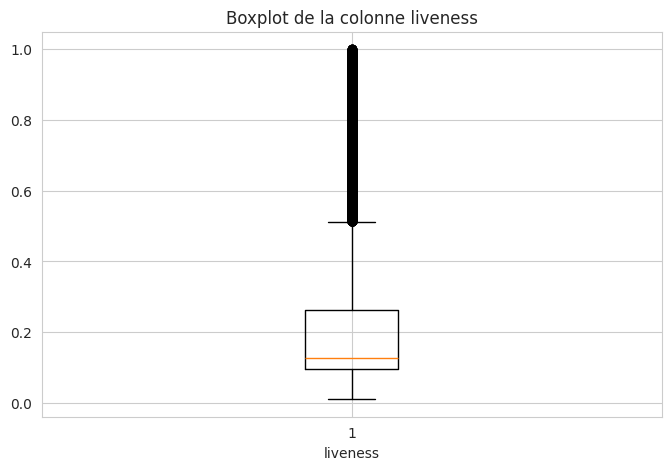

In [58]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['liveness'])

plt.title('Boxplot de la colonne liveness')
plt.xlabel('liveness')

plt.show()


- Le dataset est majoritairement composé de musique studio.
- Plus de 50 % des chansons n'ont que peu ou pas de caractéristiques live.
- Un seuil à 0.8 reste raisonnable pour retirer les vraies captations live.
- Un seuil à 0.5 "possiblement live"

In [59]:
df = df[df['liveness'] < 0.8]
df

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
58300,maria callas,""" la traviata "" : amami alfredo (act ii) - dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4,0.0394
32571,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3,0.0835
89661,rae sremmurd,"""42"" - from sr3mm",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4,0.3240
142359,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4,0.4230
77209,barns courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,199413,0.804,0.000000,G#,0.111,-4.299,Major,0.0303,95.980,4,0.7140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,got7,하드캐리 hard carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4,0.6120
219320,park hyo shin,해줄 수 없는 일 haejul su eomneun il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4,0.1550
149889,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4,0.6510
220337,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4,0.2740


In [60]:
# On observe la présence de live dans les titres
df_live = df[df['track_name'].str.contains(r'\blive\b', case=False, na=False, regex=True)]
# df_live.to_csv("live.csv", index=False)

On constate la récurrence de "- live", "(live)", "[live]".

On retire les lignes qui contiennent ces motifs.

In [61]:
df_without_live = df[~df['track_name'].str.contains(r'(?:-\s*live\b|\(live\)|\[live\])', case=False, na=False, regex=True)]
print(f"On retire {len(df) - len(df_without_live)} lignes.")


On retire 2554 lignes.


df_live.head()

In [62]:
df = df[~df['track_name'].str.contains(r"(?:-\s*live\b|\(live\)|\[live\])", case=False, na=False, regex=True)]


In [63]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 111822 lignes.


##### ***Tempo***

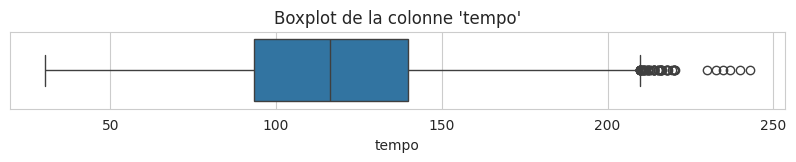

In [64]:
plt.figure(figsize=(10, 1))
sns.boxplot(x=df['tempo'])
plt.title("Boxplot de la colonne 'tempo'")
plt.show()

In [65]:
# Calcul des bornes IQR
Q1 = df['tempo'].quantile(0.25)
Q3 = df['tempo'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Borne basse : {lower_bound:.2f}")
print(f"Borne haute : {upper_bound:.2f}")

Borne basse : 23.62
Borne haute : 209.75


In [66]:
# on clean en gardant les valeurs entre les bornes
df = df[(df['tempo'] >= 23.82) & (df['tempo'] <= 208.20)]
df

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
58300,maria callas,""" la traviata "" : amami alfredo (act ii) - dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4,0.0394
32571,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3,0.0835
89661,rae sremmurd,"""42"" - from sr3mm",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4,0.3240
142359,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4,0.4230
77209,barns courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,199413,0.804,0.000000,G#,0.111,-4.299,Major,0.0303,95.980,4,0.7140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,got7,하드캐리 hard carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4,0.6120
219320,park hyo shin,해줄 수 없는 일 haejul su eomneun il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4,0.1550
149889,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4,0.6510
220337,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4,0.2740


In [67]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 111745 lignes.


Cela signifie que toutes les valeurs de tempo en dehors de cet intervalle sont considérées comme des outliers (valeurs aberrantes).

##### ***Loudness***

- Norme = Note comprise entre -60db et 0db.
- Moyenne (-9.569885) et médiane (-7.762000) prochent, donc faible dispersion des valeurs.
- Écart important (env. 40 points) entre la valeur minimale (-52.457000) et le 1er quartile (-11.771000). 
- La majorité des valuers se situent donc en deça du 1er quartile (25%). (au dessus non?)

- LOUDNESS (en dB, valeurs négatives)
- Moyenne -9.57 dB, médiane -7.76 dB
- 25% des morceaux < -11.77 dB : musique douce/intime
- Corrélation forte avec energy : variable redondante potentielle

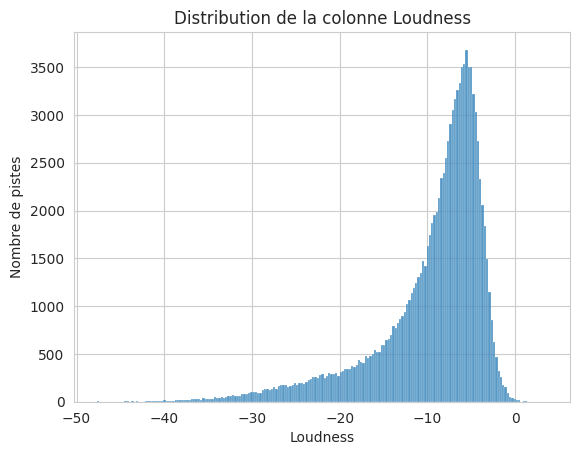

In [68]:
counts_loudness = df['loudness'].value_counts()
sns.histplot(data=df, x='loudness')
plt.title('Distribution de la colonne Loudness')
plt.xlabel('Loudness')
plt.ylabel('Nombre de pistes')
plt.show()

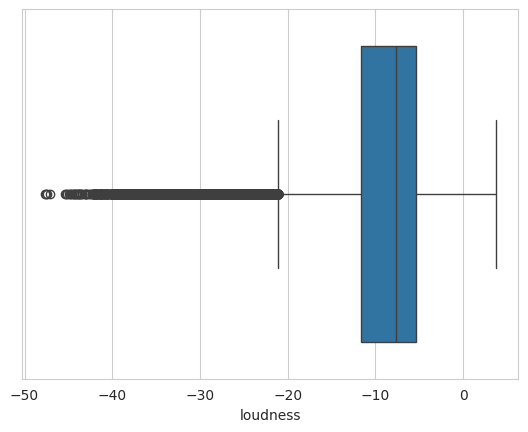

In [69]:
# Affichage d'une boite à moustache pour la variable "loudness"
# Mettre en évidence la présence d'outliers

sns.boxplot (data=df, x="loudness")
plt.show()

In [70]:
df = df[df['loudness'] <= 0]
df

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
58300,maria callas,""" la traviata "" : amami alfredo (act ii) - dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4,0.0394
32571,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3,0.0835
89661,rae sremmurd,"""42"" - from sr3mm",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4,0.3240
142359,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4,0.4230
77209,barns courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,199413,0.804,0.000000,G#,0.111,-4.299,Major,0.0303,95.980,4,0.7140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,got7,하드캐리 hard carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4,0.6120
219320,park hyo shin,해줄 수 없는 일 haejul su eomneun il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4,0.1550
149889,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4,0.6510
220337,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4,0.2740


In [71]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 111685 lignes.


##### ***Speechiness***

In [72]:
df["speechiness"].describe().T

count    111685.000000
mean          0.100273
std           0.141882
min           0.022200
25%           0.036400
50%           0.048300
75%           0.093900
max           0.967000
Name: speechiness, dtype: float64

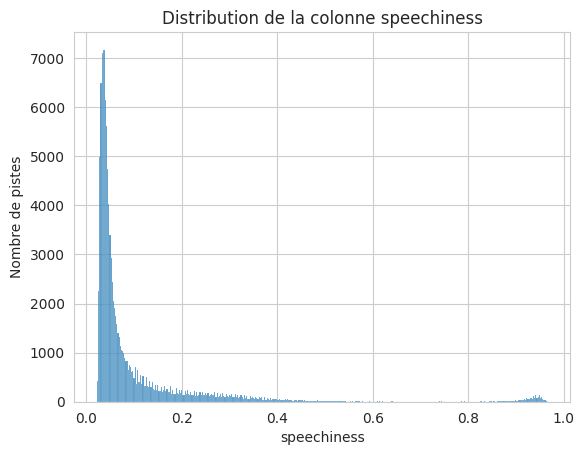

In [73]:
counts_key = df['speechiness'].value_counts()
sns.histplot(data=df, x="speechiness")
plt.title('Distribution de la colonne speechiness')
plt.xlabel('speechiness')
plt.ylabel('Nombre de pistes')
plt.show()

- On observe que la majorité des morceaux ont une "speechiness" faible (valeurs proches de 0).
- Les percentiles montrent que 90% des morceaux ont une valeur inférieure à 0.278, ce qui indique que les morceaux très "parlés" sont rares.
- La moyenne (mean) est de 0.120765, ce qui confirme que la plupart des morceaux contiennent peu de paroles selon ce critère.

In [74]:
df = df[df['speechiness']<=0.66]

In [75]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 109594 lignes.


##### ***Valence***

In [76]:
df['valence'].describe()

count    109594.000000
mean          0.460825
std           0.268169
min           0.000000
25%           0.233000
50%           0.456000
75%           0.679000
max           1.000000
Name: valence, dtype: float64

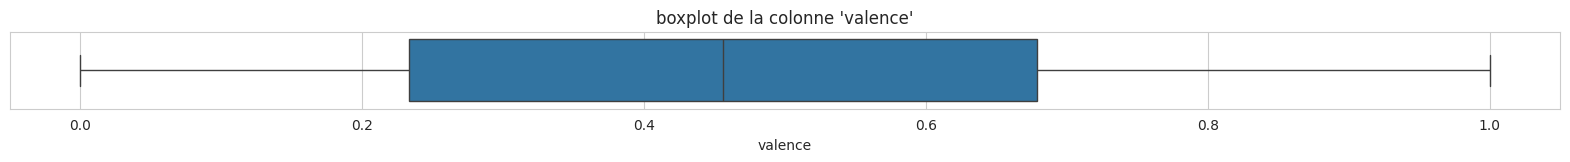

In [77]:
plt.figure(figsize=(20, 1))
sns.boxplot(x=df['valence'])
plt.title("boxplot de la colonne 'valence'")
plt.show()

Voir la corrélation avec le mode et peut être la clé.

In [78]:
df.to_csv("Moodify_base.csv", index=False)


# **Analyse préliminaire de correlation**

# **Enrichissement**

##### **Enrichissement des genres avec l'API Spotify**

- Créer un compte https://developer.spotify.com/documentation/web-api
- Créer une app:
    - Application URL : mettre http://localhost ou l'URL du projet
- Récupérer SPOTIFY_CLIENT_ID et SPOTIFY_CLIENT_SECRET
- Créer un fichier .env et ajouter:
    - SPOTIFY_CLIENT_ID=laclérécupérée
    - SPOTIFY_CLIENT_SECRET=lacléesecrèterécupérée

In [79]:
# Garde une ligne par artiste (première occurrence)
df_unique_artists = df.drop_duplicates(subset=['artist_name'])
df_unique_artists.to_csv("artists_unique.csv", index=False)

# Tri par popularité décroissante
# df_sorted = df_unique_artists.sort_values(by='popularity', ascending=False)

# Prend les 100 premiers (échantillon)
# df_top100 = df_sorted.head(100)

# Sauvegarde du top_100 pour test échantillon
# df_top100.to_csv("top_100.csv", index=False)

In [80]:
len(df_unique_artists)

12891

Ce script permet de récupérer les genres selon le nom des artistes

In [81]:
"""
import pandas as pd
import spotipy
import time
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
import os
from tqdm import tqdm

# === 1. Authentification Spotify ===
load_dotenv()
client_id = os.getenv('SPOTIFY_CLIENT_ID')
client_secret = os.getenv('SPOTIFY_CLIENT_SECRET')
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

# === 2. Charger les données et trier par popularité ===
df = pd.read_csv("artists_genre.csv")  # ou "top_100.csv" si on veut faire le test sur l'échantillon

# 1. Extraire la liste d'artistes
artists = df['artist_name']

artist_genres = {}

# 2. Pour chaque artiste, chercher son artist_id via recherche et récupérer les genres
for artist_name in tqdm(artists, desc="Récupération genres artistes"):
    try:
        results = sp.search(q=f'artist:{artist_name}', type='artist', limit=1)
        items = results['artists']['items']
        if items:
            artist_id = items[0]['id']
            genres = items[0]['genres']
            artist_genres[artist_name] = genres
        else:
            artist_genres[artist_name] = []
        time.sleep(0.1)
    except Exception as e:
        print(f"Erreur artiste {artist_name}: {e}")
        artist_genres[artist_name] = []

# 3. Ajouter une colonne genres dans le DataFrame à partir du mapping
df['genres'] = df['artist_name'].map(artist_genres)

df.to_csv("artists_with_genres.csv", index=False) # ou top100_with_genres.csv si on veut l'échantillon
print("Export terminé.")

"""


'\nimport pandas as pd\nimport spotipy\nimport time\nfrom spotipy.oauth2 import SpotifyClientCredentials\nfrom dotenv import load_dotenv\nimport os\nfrom tqdm import tqdm\n\n# === 1. Authentification Spotify ===\nload_dotenv()\nclient_id = os.getenv(\'SPOTIFY_CLIENT_ID\')\nclient_secret = os.getenv(\'SPOTIFY_CLIENT_SECRET\')\nauth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)\nsp = spotipy.Spotify(auth_manager=auth_manager)\n\n# === 2. Charger les données et trier par popularité ===\ndf = pd.read_csv("artists_genre.csv")  # ou "top_100.csv" si on veut faire le test sur l\'échantillon\n\n# 1. Extraire la liste d\'artistes\nartists = df[\'artist_name\']\n\nartist_genres = {}\n\n# 2. Pour chaque artiste, chercher son artist_id via recherche et récupérer les genres\nfor artist_name in tqdm(artists, desc="Récupération genres artistes"):\n    try:\n        results = sp.search(q=f\'artist:{artist_name}\', type=\'artist\', limit=1)\n        items = result

In [ ]:
#df_test = pd.read_csv("top100_with_genres.csv")
df_unique_artists_genres = pd.read_csv("artists_with_genres.csv")
cols_order = [
    'track_id',
    'track_name',
    'genres',
    'artist_name',
    'popularity',
    'duration_ms'
]

# Ajouter le reste des colonnes dans l'ordre original, sauf celles déjà listées
remaining_cols = [col for col in df.columns if col not in cols_order]

# Nouvelle liste complète des colonnes dans l'ordre voulu
new_order = cols_order + remaining_cols

# Réorganiser le DataFrame
df_ordered_artists= df_unique_artists_genres[new_order]

df_ordered_artists.head()

,track_id,track_name,genres,artist_name,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0wtpkz93wATDkUExJVuXEl,""" la traviata "" : amami alfredo (act ii) - dig...","['opera', 'classical']",maria callas,31,131933,0.993000,0.364,0.275,0.0284,F,0.293,-11.832,Major,0.0430,86.096,4,0.0394
1,7JkDONXIbcKUQ7QzlLBumL,"""1点""","['anime', 'soundtrack']",yuki hayashi,23,158000,0.025000,0.250,0.762,0.5160,C#,0.094,-12.794,Minor,0.0468,89.093,3,0.0835
2,5lf91lPnGKtIqsgmG1z8Ip,"""42"" - from sr3mm",[],rae sremmurd,53,238020,0.002750,0.968,0.563,0.0000,C#,0.108,-6.744,Major,0.1250,130.039,4,0.3240
3,25Sd73fleKUVPNqITPZkn1,"""45""",[],the gaslight anthem,48,202493,0.000696,0.315,0.970,0.0000,G#,0.277,-4.709,Major,0.1020,178.068,4,0.4230
4,6YQUuoMnRIMaOmouYoMfQr,"""99""",[],barns courtney,69,199413,0.005980,0.552,0.804,0.0000,G#,0.111,-4.299,Major,0.0303,95.980,4,0.7140


In [83]:
# Verifie le type des valeurs de la nouvelle colonne genre 
df_ordered_artists['genres'].apply(type).unique()


array([<class 'str'>], dtype=object)

In [84]:
# Sur la colonne genre on applique quand la longueur de la liste est égale à 0 fait la somme
empty_genres_count = df_ordered_artists['genres'].apply(lambda x: len(x) == 0).sum()
print(f"On compte { empty_genres_count} artistes dont le genre n'a pas pu être identifié")

On compte 0 artistes dont le genre n'a pas pu être identifié


In [85]:
# Tri par ordre alphabétique par artiste
df_ordered_artists = df_ordered_artists.sort_values(by='artist_name', ascending=True)

In [86]:
# Exporte un csv des genres vides
df_ordered_artists[df_ordered_artists['genres'].apply(lambda x: len(x) == 0)].to_csv("genres_vides.csv", index=False)

#### **Complétion avec l'API Last.fm**

- Créer un compte https://www.last.fm/join
- Créer une application https://www.last.fm/api/account/create:
    - Application URL : mettre http://localhost ou l'URL du projet
- Récupérer API Key 
- Placer la clé dans le fichier .env :
    - LASTFM_API_KEY=cléchiffréerécupérée



Ce script permet d'obtenir un dataframe des genres complétés sur les lignes encore vides.

In [87]:
"""

import pandas as pd
import requests
import os
from dotenv import load_dotenv
from tqdm import tqdm

# === 1. Chargement clé API Last.fm ===
load_dotenv()
LASTFM_API_KEY = os.getenv("LASTFM_API_KEY")

def get_lastfm_genres(artist_name):
    
    # Récupère les tags (genres) associés à un artiste via l'API Last.fm.
    
    url = "http://ws.audioscrobbler.com/2.0/"
    params = {
        "method": "artist.gettoptags",
        "artist": artist_name,
        "api_key": LASTFM_API_KEY,
        "format": "json"
    }

    try:
        response = requests.get(url, params=params)
        data = response.json()

        if "toptags" in data and "tag" in data["toptags"]:
            tags = data["toptags"]["tag"]
            top_tags = [tag["name"] for tag in tags if int(tag.get("count", 0)) > 0]
            return top_tags[:3]
        else:
            return []
    except Exception as e:
        print(f"Erreur pour l'artiste '{artist_name}' : {e}")
        return []

# === 2. Charger les données ===
df = pd.read_csv("artists_with_genres.csv")

# === 3. S'assurer que la colonne 'genres' est bien des listes (pas des chaînes de type "['pop']") ===
import ast
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# === 4. Identifier les lignes où la liste de genres est vide ===
df['genres_missing'] = df['genres'].apply(lambda g: isinstance(g, list) and len(g) == 0)

# === 5. Compléter les genres vides avec l'API Last.fm ===
for i, row in tqdm(df[df['genres_missing']].iterrows(), total=df['genres_missing'].sum(), desc="Complétion via Last.fm"):
    artist_name = row['artist_name']
    new_genres = get_lastfm_genres(artist_name)
    df.at[i, 'genres'] = new_genres

# === 6. Nettoyage : supprimer la colonne temporaire ===
df.drop(columns=['genres_missing'], inplace=True)

# === 7. Export du nouveau DataFrame ===
df.to_csv("artists_with_genres_completed.csv", index=False)
print("Fichier mis à jour : artists_with_genres_completed.csv")

"""

'\n\nimport pandas as pd\nimport requests\nimport os\nfrom dotenv import load_dotenv\nfrom tqdm import tqdm\n\n# === 1. Chargement clé API Last.fm ===\nload_dotenv()\nLASTFM_API_KEY = os.getenv("LASTFM_API_KEY")\n\ndef get_lastfm_genres(artist_name):\n    \n    # Récupère les tags (genres) associés à un artiste via l\'API Last.fm.\n    \n    url = "http://ws.audioscrobbler.com/2.0/"\n    params = {\n        "method": "artist.gettoptags",\n        "artist": artist_name,\n        "api_key": LASTFM_API_KEY,\n        "format": "json"\n    }\n\n    try:\n        response = requests.get(url, params=params)\n        data = response.json()\n\n        if "toptags" in data and "tag" in data["toptags"]:\n            tags = data["toptags"]["tag"]\n            top_tags = [tag["name"] for tag in tags if int(tag.get("count", 0)) > 0]\n            return top_tags[:3]\n        else:\n            return []\n    except Exception as e:\n        print(f"Erreur pour l\'artiste \'{artist_name}\' : {e}")\n   

In [88]:
df_complet= pd.read_csv('artists_with_genres_completed.csv')


In [95]:
len(df_complet)

12891

In [93]:
len(df_ordered_artists)

12891

Tous les noms d'artistes ont un genre musical après enrichissement.

In [ ]:
# Retire le résidu d'inex dû à un oubli de index=False lors de la création d'un csv
df_complet.iloc[:,1:]

In [101]:
df_base = pd.read_csv('Moodify_base.csv')

In [ ]:
# Indexer par 'track_id' pour pouvoir faire une mise à jour ligne par ligne
df_base_indexed = df_base.set_index('track_id')
df_complet_indexed = df_complet.set_index('track_id')

# Mettre à jour les lignes existantes dans df_ordered_artists avec celles de df_complet
df_base_indexed.update(df_complet_indexed)

# Réinitialiser l'index pour revenir à un DataFrame classique
df_enrichi_genres = df_base_indexed.reset_index()

df_enrichi_genres.to_csv('Genre_OK.csv')

In [106]:
len(df_enrichi_genres)

109594

#### **Enrichissement paroles**

#### **Enrichissement pochettes d'album**

#### **Tag d'humeur**

- agrémenter des paroles.
- agrémenter des pochettes d'album
- agrémenter de tags d'humeur

**API LAST FM**

**SPOTIFY API**

**MUSICBRAINZ**

utiliser une API cache locale ou un dump JSON pré-téléchargé 

# **Analyse de corrélation**